## Setup

### Imports, Helpers, and Mount Drive

In [34]:
# imports
from google.colab import drive
import pandas as pd
from scipy import stats
from random import sample
from os import path
#settings
pd.options.display.max_columns = 100
# helpers
get_file = lambda rel_fpath: path.join('/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter',rel_fpath)
get_cluster_file = lambda rel_fpath: path.join('/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Clusters',rel_fpath)
given=['FOOD','CROP FARMS','DAIRY FARMS','SOIL','WATER','LAKES','MANURE','MONEY','RAIN','PEOPLE','ALGAE','OTHER','NONE']
score_col = 'Score (1 if all are 1)'
#mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Inputs

In [0]:
### This can be used if someone ever wants to get data straight from Sheets, but it doesn't seem to infer datatypes correctly.
# from google.colab import auth
# auth.authenticate_user()
# import gspread
# from oauth2client.client import GoogleCredentials
# import pandas as pd
# gc = gspread.authorize(GoogleCredentials.get_application_default())
# worksheet = gc.open('Concept Map Scoring Version 2.0').sheet1
# rows = worksheet.get_all_values()
# cm_df = pd.DataFrame.from_records(rows)
# cm_df.columns = cm_df.iloc[0]
# cm_df.drop(cm_df.index[0], inplace=True)

In [36]:
!ls '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data'

 Clusters	    'Filtered Log Data'  'Raw Log Data'
'Concept Map Data'  'Full Data Tables'	 'Survey Responses'


In [0]:
concept_map_file = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Concept Map Data/Concept Map Data 20200218.tsv'
log_features_file = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Filtered Log Data/Only school day 11-25 pid sessions.csv'
cm_df = pd.read_csv(concept_map_file,delimiter='\t')
lf_df = pd.read_csv(log_features_file,index_col=['player_id','num_play'])

In [38]:
lf_df

,,sessID,lvl0_EventCount,lvl1_EventCount,lvl2_EventCount,lvl3_EventCount,lvl4_EventCount,lvl5_EventCount,lvl6_EventCount,lvl7_EventCount,lvl8_EventCount,lvl9_EventCount,lvl0_ActiveEventCount,lvl1_ActiveEventCount,lvl2_ActiveEventCount,lvl3_ActiveEventCount,lvl4_ActiveEventCount,lvl5_ActiveEventCount,lvl6_ActiveEventCount,lvl7_ActiveEventCount,lvl8_ActiveEventCount,lvl9_ActiveEventCount,lvl0_durationInSecs,lvl1_durationInSecs,lvl2_durationInSecs,lvl3_durationInSecs,lvl4_durationInSecs,lvl5_durationInSecs,lvl6_durationInSecs,lvl7_durationInSecs,lvl8_durationInSecs,lvl9_durationInSecs,lvl0_count_gamestate_logs,lvl1_count_gamestate_logs,lvl2_count_gamestate_logs,lvl3_count_gamestate_logs,lvl4_count_gamestate_logs,lvl5_count_gamestate_logs,lvl6_count_gamestate_logs,lvl7_count_gamestate_logs,lvl8_count_gamestate_logs,lvl9_count_gamestate_logs,lvl0_count_achievements,lvl1_count_achievements,lvl2_count_achievements,lvl3_count_achievements,lvl4_count_achievements,lvl5_count_achievements,lvl6_count_achievements,lvl7_count_achievements,lvl8_count_achievements,...,sess_min_num_poop_in_play,sess_max_num_poop_in_play,sess_min_num_milk_in_play,sess_max_num_milk_in_play,sess_count_fullness_motivated_txt_emotes_per_capita,sess_count_fullness_desperate_txt_emotes_per_capita,sess_count_energy_desperate_txt_emotes_per_capita,sess_count_joy_motivated_txt_emotes_per_capita,sess_count_joy_desperate_txt_emotes_per_capita,sess_count_puke_txt_emotes_per_capita,sess_count_yum_txt_emotes_per_capita,sess_count_tired_txt_emotes_per_capita,sess_count_happy_txt_emotes_per_capita,sess_count_swim_txt_emotes_per_capita,sess_count_sale_txt_emotes_per_capita,sess_percent_positive_emotes,sess_percent_negative_emotes,sess_percent_neutral_emotes,sess_total_positive_emotes,sess_total_negative_emotes,sess_total_neutral_emotes,sess_avg_distance_between_poop_placement_and_lake,sess_avg_avg_distance_between_buildings,sess_count_farmfails,sess_max_avg_lake_nutrition,sess_min_avg_lake_nutrition,sess_count_blooms,sess_count_inspect_tile,sess_count_open_achievements,sess_count_open_shop,sess_count_deaths,event_sequence,sess_percent_building_a_farm_on_highest_nutrition_tile,sess_percent_placing_fertilizer_on_lowest_nutrient_farm,sess_EventCount,sess_ActiveEventCount,play_year,play_month,play_day,play_hour,play_minute,play_second,continue,language,audio,fullscreen,version,debug,persistentSessionID,sessDuration
player_id,num_play,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a007,1,19100107580733930,72,102.0,155.0,109.0,98.0,58.0,11.0,NaN,NaN,NaN,26.0,36.0,91.0,63.0,48.0,28.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,10.0,2.0,0.0,0.0,0.0,0.0,8.0,15.0,0.0,107.0,17.0,0.000000,0.106918,0.893082,159,159,159,1.372223,2.305314,8,1.686792,0.562264,0,137,1,16,2,1234353D14424442D,1.000000,0.0,578,279,2019,11,25,13,58,35,0,english,1,0,15,0,19100107580733930,1858.034
a003,1,19100107582106104,67,193.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,96.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,9.0,2.0,0.0,0.0,0.0,0.0,7.0,13.0,0.0,134.0,9.0,0.000000,0.086207,0.913793,174,174,174,1.276142,1.911672,4,1.379310,0.224138,0,41,0,6,2,1234D1234543D,0.333333,0.0,420,168,2019,11,25,13,58,56,0,english,1,0,15,0,19100107582106104,869.910
a006,1,19100107582428820,201,118.0,455.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,38.0,45.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,13.0,0.0,108.0,9.0,0.000000,0.107383,0.892617,149,149,149,1.393302,1.562228,3,1.280757,0.258675,0,56,2,18,2,123D12443453D,1.000000,0.0,793,149,2019,11,25,13,58,48,0,english,1,0,15,0,19100107582428820,1059.260
a023,1,19100107582483028,67,95.0,

In [39]:
cm_df

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,0,1,0,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,0,1,0,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Jenn,A107,Post,food,soil,FOOD,is grown in,SOIL,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,0,0,NaN,COMPUTER,0.0,0.0,0.0
2468,Jenn,A107,Post,money,food,MONEY,food costs money,FOOD,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,1,0,0,NaN,COMPUTER,1.0,0.0,0.0
2469,Jenn,A107,Post,rain,soil,RAIN,waters the soil,SOIL,1,NaN,Jenn,NaN,1.0,1.0,0.0,0,0,1,0,NaN,COMPUTER,0.0,1.0,0.0
2470,Jenn,A107,Post,rain,lakes,RAIN,is found in,LAKES,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,1,0,NaN,COMPUTER,0.0,1.0,0.0


### Check concept map df for unexpected NaNs

In [40]:
cm_df.loc[:,['from raw','to raw']] = cm_df[['from raw','to raw']].fillna('None')
problem_row_indices = cm_df.index[cm_df[['from raw','to raw']].isna().any(axis=1)]
cm_df.loc[problem_row_indices,:]

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


### Show IDs we have data for:

In [41]:
print('---Logged PIDS---')
all_log_pids = sorted(set(lf_df.index.levels[0]))
for i in range(7):
    class_ids = [p[2:] for p in all_log_pids if p.lower().startswith(f'a{i}')]
    print(f"Players in class id=a{i} (n={len(class_ids)}) - {','.join(class_ids)}")
   
print('\n\n---Concept Map Data PIDS---')
all_cm_pids = sorted(set(cm_df['User ID']))
for i in range(7):
    class_ids = [p[2:] for p in all_cm_pids if p.lower().startswith(f'a{i}')]
    print(f"Players in class id=a{i} (n={len(class_ids)}) - {','.join(class_ids)}")

---Logged PIDS---
Players in class id=a0 (n=25) - 01,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Players in class id=a1 (n=20) - 01,02,04,05,06,07,08,10,11,12,13,14,15,16,17,18,19,20,21,22
Players in class id=a2 (n=0) - 
Players in class id=a3 (n=12) - 01,02,03,04,05,06,07,08,09,10,11,13
Players in class id=a4 (n=15) - 02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
Players in class id=a5 (n=20) - 02,03,04,05,06,07,08,09,10,11,12,14,15,16,17,18,19,20,21,22
Players in class id=a6 (n=21) - 01,02,03,05,06,07,08,09,11,12,13,14,15,16,17,18,21,22,23,24,25


---Concept Map Data PIDS---
Players in class id=a0 (n=24) - 01,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26
Players in class id=a1 (n=22) - 01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22
Players in class id=a2 (n=0) - 
Players in class id=a3 (n=12) - 01,02,04,05,06,07,08,09,10,11,12,13
Players in class id=a4 (n=17) - 01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,__
Play

### Reformat Cluster Map DF into a per-player summary

In [0]:
def apply_functions_to_df(df, function_list, verbose=False):
    ret = df
    if verbose:
        print(f'df0 len = {len(ret)}')
    for i,f in enumerate(function_list):
        ret = f(ret)
        if type(ret) is not int and verbose:
            print(f'df{i+1} len = {len(ret)}')
    return ret
def equal(col, val):
    return lambda df: df.loc[df[col]==val,:]
def match(col, regex,case=True,flags=0):
    return lambda df: df.loc[df[col].str.match(regex,case,flags),:]
def search(col, regex,case=True,flags=0):
    return lambda df: df.loc[df[col].str.contains(regex,case,flags),:]
def search2colsOR(col1, col2, regex):
    return lambda df: df.loc[df[col1].str.contains(regex) | df[col2].str.contains(regex), :]
def searchPair(col1, col2, regex1,regex2):
    return lambda df: df.loc[(df[col1].str.contains(regex1) & df[col2].str.contains(regex2)) |
                             (df[col1].str.contains(regex2) & df[col2].str.contains(regex1)), :]
def sum_col(col):
    return lambda df: df.loc[:,col].sum()
def len_df():
    return lambda df: len(df)
def identity():
    return lambda df: df

In [0]:
rel_col = 'Relevant to System: Algae bloom, population sustainability, need for fertilizer'
df = pd.DataFrame(index=sorted(set(cm_df['User ID'])))
for qualifier, agg_func in [('All',len_df()),('Correct',sum_col(score_col)),('Relevent', sum_col(rel_col))]:
  for p in ['pre','post']:
    df[f'{p} # connections {qualifier}'] = [apply_functions_to_df(cm_df,[
        match('User ID',idx,case=False),
        match('Pre/Post',p,case=False),
        agg_func
    ]) for idx in df.index]
    for item_type in given:
      df[f"{p} # {item_type} {qualifier}"] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        search2colsOR('from clean', 'to clean',item_type),
        agg_func
      ]) for idx in df.index]
      df[f"{p} # {item_type} {qualifier}"] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        equal(score_col, 1),
        search2colsOR('from clean', 'to clean',item_type),
        agg_func
      ]) for idx in df.index]
    for col,name in [('Social / Economic (mentions $, people, food for people)', 'soc'),
      ('Biological / Ecological (mentions alge, soil lakes)','bio'),
      ('Farming (famrs, crops, fertilizer/manure)','farm'),
      ('Relationship Description Correct','desc correct'),
      ('Relevant to System: Algae bloom, population sustainability, need for fertilizer', 'relevent')]:
      df[f'{p} # {name} {qualifier}'] = [apply_functions_to_df(cm_df,[
        equal('User ID',idx.upper()),
        equal('Pre/Post',p),
        equal(col,1),
        agg_func
      ]) for idx in df.index]

for c in df.columns:
  if '#' in c:
    df[c.replace('#','%')] = df[c].astype(int) / df[f'{c.split()[0]} # connections All'] * 100
for c in df.columns:
  if c.startswith('pre'):
    pre_column = c
    post_column = c.replace('pre','post')
    delta_column = c.replace('pre','d')
    df[delta_column] = df[post_column] - df[pre_column]

In [0]:
# df.loc[~df['pre # connections All'].astype(bool) | ~df['post # connections All'].astype(bool), [
#       'pre # connections All','post # connections All'
# ]].fillna(0)

In [46]:
df2 = df[df['pre # connections All'].astype(bool) & df['post # connections All'].astype(bool)].fillna(0)
# df2.loc['mean',:] = df2.mean()
# df2.loc['std',:] = df2.std()
df2.round(1)

,pre # connections All,pre # FOOD All,pre # CROP FARMS All,pre # DAIRY FARMS All,pre # SOIL All,pre # WATER All,pre # LAKES All,pre # MANURE All,pre # MONEY All,pre # RAIN All,pre # PEOPLE All,pre # ALGAE All,pre # OTHER All,pre # NONE All,pre # soc All,pre # bio All,pre # farm All,pre # desc correct All,pre # relevent All,post # connections All,post # FOOD All,post # CROP FARMS All,post # DAIRY FARMS All,post # SOIL All,post # WATER All,post # LAKES All,post # MANURE All,post # MONEY All,post # RAIN All,post # PEOPLE All,post # ALGAE All,post # OTHER All,post # NONE All,post # soc All,post # bio All,post # farm All,post # desc correct All,post # relevent All,pre # connections Correct,pre # FOOD Correct,pre # CROP FARMS Correct,pre # DAIRY FARMS Correct,pre # SOIL Correct,pre # WATER Correct,pre # LAKES Correct,pre # MANURE Correct,pre # MONEY Correct,pre # RAIN Correct,pre # PEOPLE Correct,pre # ALGAE Correct,...,d % MANURE All,d % MONEY All,d % RAIN All,d % PEOPLE All,d % ALGAE All,d % OTHER All,d % NONE All,d % soc All,d % bio All,d % farm All,d % desc correct All,d % relevent All,d % connections Correct,d % FOOD Correct,d % CROP FARMS Correct,d % DAIRY FARMS Correct,d % SOIL Correct,d % WATER Correct,d % LAKES Correct,d % MANURE Correct,d % MONEY Correct,d % RAIN Correct,d % PEOPLE Correct,d % ALGAE Correct,d % OTHER Correct,d % NONE Correct,d % soc Correct,d % bio Correct,d % farm Correct,d % desc correct Correct,d % relevent Correct,d % connections Relevent,d % FOOD Relevent,d % CROP FARMS Relevent,d % DAIRY FARMS Relevent,d % SOIL Relevent,d % WATER Relevent,d % LAKES Relevent,d % MANURE Relevent,d % MONEY Relevent,d % RAIN Relevent,d % PEOPLE Relevent,d % ALGAE Relevent,d % OTHER Relevent,d % NONE Relevent,d % soc Relevent,d % bio Relevent,d % farm Relevent,d % desc correct Relevent,d % relevent Relevent
A001,11,3,4,2,1,0,1,2,2,0,0,1,0,0,4,2,7,8,8,6,0,1,1,0,0,1,0,2,0,0,1,0,0,2,0,0,4,4,8,3,4,2,1,0,1,2,2,0,0,1,...,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,-3.0,-18.2,-63.6,-6.1,-6.1,-22.7,-27.3,-19.7,-1.5,-9.1,0.0,7.6,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,15.2,-9.1,-54.5,-22.7,-22.7,-6.1,-27.3,-19.7,-1.5,-9.1,0.0,7.6,-18.2,15.2,0.0,0.0,7.6,0.0,0.0,15.2,-9.1,-54.5,-22.7,-6.1
A004,11,2,5,1,1,1,1,1,3,0,4,1,0,0,6,2,6,10,10,13,1,2,2,1,2,2,3,4,1,3,1,0,0,7,4,8,12,12,10,2,5,1,1,1,1,1,3,0,4,1,...,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,12.6,7.0,1.4,1.4,-6.3,-10.5,-30.1,6.3,-1.4,6.3,6.3,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,14.0,-0.7,-6.3,-6.3,1.4,-10.5,-30.1,6.3,-1.4,6.3,6.3,14.0,3.5,7.7,-13.3,-1.4,0.0,0.0,-0.7,21.7,-0.7,1.4,1.4
A005,7,0,1,1,0,0,1,1,1,0,3,0,0,0,5,1,2,7,4,11,0,1,2,0,1,2,1,0,0,4,1,0,0,9,0,0,8,6,4,0,1,1,0,0,1,1,1,0,3,0,...,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,10.4,-14.3,-28.6,-27.3,-2.6,-2.6,0.0,-5.2,3.9,0.0,9.1,3.9,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,-6.5,-14.3,-28.6,-2.6,-2.6,-2.6,0.0,-5.2,3.9,0.0,9.1,3.9,-5.2,-14.3,0.0,-6.5,9.1,0.0,0.0,-6.5,-14.3,-28.6,-2.6,-2.6
A006,5,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3,2,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0,0.0,0.0,-20.0,0.0,0.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0,-20.0,0.0,0.0,-20.0,0.0,0.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,-20.0,-20.0
A007,40,3,5,4,2,3,3,3,5,1,5,1,1,0,10,5,12,20,18,7,2,0,0,1,1,1,2,0,0,3,0,0,0,5,0,0,5,7,33,3,5,4,2,3,3,3,5,1,5,1,...,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,46.4,-12.5,-30.0,21.4,55.0,-11.1,21.1,-12.5,-10.0,9.3,6.8,6.8,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,20.4,-7.5,-30.0,26.4,26.4,10.0,21.1,-12.5,-10.0,9.3,6.8,6.8,21.1,-12.5,-2.5,30.4,-2.5,-2.5,0.0,48.9,-7.5,-30.0,26.4,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [55]:
df2[[f'{p} {q} connections Correct' for p in ['pre','post','d'] for q in '#%']].describe().round(1)

,pre # connections Correct,pre % connections Correct,post # connections Correct,post % connections Correct,d # connections Correct,d % connections Correct
count,93.0,93.0,93.0,93.0,93.0,93.0
mean,7.4,61.0,7.4,64.6,0.0,3.7
std,5.0,24.2,5.1,27.5,5.2,22.6
min,0.0,0.0,0.0,0.0,-28.0,-85.7
25%,4.0,50.0,4.0,50.0,-2.0,-6.7
50%,7.0,66.7,7.0,69.2,0.0,1.5
75%,9.0,76.9,10.0,83.3,2.0,19.6
max,33.0,100.0,26.0,100.0,17.0,57.1


### Insert Survey Responses

In [0]:
!ls '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Survey Responses/'

'Lakeland Evaluation Student Survey (Responses).tsv'


In [0]:
survey_file = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Survey Responses/Lakeland Evaluation Student Survey (Responses).tsv'
survey_df = pd.read_csv(survey_file,sep='\t')
survey_df.index = [s.upper() for s in survey_df['Student User ID Code']]
survey_df = survey_df['Have you ever lived or worked on a farm?'].map({'Yes':True,'No':False})

In [0]:
clusters = sorted(set(cluster_df['label']))
tdf = pd.DataFrame(index=clusters)
cluster_dict = {cl:apply_functions_to_df(full_df,[equal('label',cl)]) for cl in clusters}
for cl in clusters:
  print(f'C{cl}: n={len(cluster_dict[cl])}')
print(f'{"Column Name":<40}{"H Value":<10}{"P Value"}')
for c in full_df.columns:
  samples = [list(cluster_dict[i][c]) for i in [0,1,2,3]]
  try:
    H,p = stats.kruskal(*samples)
  except:
    continue
  if p < .05:
    print(f'{c[:35]:<40}{round(H,3):<10}{round(p,4)}')

NameError: ignored

kruskal is good for non-normal distributions in comparision to the more common ANOVA analysis


In [0]:
tdf = pd.DataFrame(columns=clusters)
for cl in clusters:
  tdf[cl] = cluster_dict[cl]['d % CROP FARMS Correct'].describe()
tdf

NameError: ignored

### Join Survey and Cluster Data

In [0]:
def add_label_column(to_df, from_df_fpath, label_col_name, label_name):
  from_df = pd.read_csv(from_df_fpath)
  from_df.drop_duplicates(subset=['player_id'],inplace=True)#,keep='last')
  from_df.index = [x.upper() for x in from_df['player_id']]
  from_df.drop(['player_id'], axis=1,inplace=True)
  from_df.rename({label_col_name: label_name}, axis=1, inplace=True)
  print(from_df.columns)
  return to_df.join(from_df)
df2 = add_label_column(df2, get_cluster_file('CM data cluster export achs 20200212.csv'), 'label', 'ach label')
df2 = add_label_column(df2, get_cluster_file('CM data cluster export 20200212.csv'), 'label', 'player label')
df2 = add_label_column(df2, get_cluster_file('CM data cluster export feedback 20200218.csv'), 'label', 'feedback label')

Index(['pop_achs_per_second', 'farm_achs_per_second', 'money_achs_per_second',
       'bloom_achs_per_second', 'ach label'],
      dtype='object')
Index(['sum_count_buy_home_lvl_0_to_1', 'sum_count_buy_farm_lvl_0_to_1',
       'sum_count_buy_livestock_lvl_0_to_1',
       'sum_count_buy_fertilizer_lvl_0_to_1',
       'avg_tiles_hovered_before_placing_farm_lvl_0_to_1', 'player label'],
      dtype='object')
Index(['sess_count_food_produced', 'sess_count_milk_produced',
       'sess_count_achievements', 'sess_count_deaths', 'sess_count_blooms',
       'feedback label'],
      dtype='object')


In [0]:
final_df = final_df.join(survey_df)

### Save Final DF

In [0]:
final_df = df2[[f'pre {q} {metric} Correct' for q in '#%' for metric in ['connections','soc','bio','farm']]+[c for c in df2.columns if 'label' in c]]
final_df = final_df.dropna().astype(int)
# final_df.to_csv(get_cluster_file('Final CM-Cluster Output 20200219.csv'))

In [0]:
!ls '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Clusters'

 cluster_export
'cluster export 20200212.csv'
'cluster export achs 20200212.csv'
 cluster_export.csv
'cluster export feedback 20200218.csv'
'cluster export window 0-2 20200212.csv'
'CM data cluster export 20200212.csv'
'CM data cluster export achs 20200212.csv'
'CM data cluster export feedback 20200218.csv'
'CM data cluster export window 0-2 20200212.csv'
'exported Daves clusters.csv'
'exported Daves clusters reworked.csv'
'Final CM-Cluster Output 20200218.csv'
'Final CM-Cluster Output 20200218.gsheet'
'Final CM-Cluster Output 20200219.csv'
'Final CM-Cluster Output including NAN 20200219.csv'


## Finally start working with the CM data

### Insert clustering

### Paired t-Tests

In [0]:

feature_pairs = [[f'pre {f}',f'post {f}'] for f in [
        '% connections Correct', '% soc Correct', '% bio Correct', '% farm Correct']]
index_samples = [sample(list(df2.index),15) for i in range(30)]

In [0]:
sampled_df = pd.DataFrame(columns=df2.columns)
for i,s in enumerate(index_samples):
  sampled_df.loc[i+1,:] = df2.loc[s,:].mean()
sampled_df

,pre # connections All,pre # FOOD All,pre # CROP FARMS All,pre # DAIRY FARMS All,pre # SOIL All,pre # WATER All,pre # LAKES All,pre # MANURE All,pre # MONEY All,pre # RAIN All,pre # PEOPLE All,pre # ALGAE All,pre # OTHER All,pre # NONE All,pre # soc All,pre # bio All,pre # farm All,pre # desc correct All,pre # relevent All,post # connections All,post # FOOD All,post # CROP FARMS All,post # DAIRY FARMS All,post # SOIL All,post # WATER All,post # LAKES All,post # MANURE All,post # MONEY All,post # RAIN All,post # PEOPLE All,post # ALGAE All,post # OTHER All,post # NONE All,post # soc All,post # bio All,post # farm All,post # desc correct All,post # relevent All,pre # connections Correct,pre # FOOD Correct,pre # CROP FARMS Correct,pre # DAIRY FARMS Correct,pre # SOIL Correct,pre # WATER Correct,pre # LAKES Correct,pre # MANURE Correct,pre # MONEY Correct,pre # RAIN Correct,pre # PEOPLE Correct,pre # ALGAE Correct,...,d % LAKES Correct,d % MANURE Correct,d % MONEY Correct,d % RAIN Correct,d % PEOPLE Correct,d % ALGAE Correct,d % OTHER Correct,d % NONE Correct,d % soc Correct,d % bio Correct,d % farm Correct,d % desc correct Correct,d % relevent Correct,d % connections Relevent,d % FOOD Relevent,d % CROP FARMS Relevent,d % DAIRY FARMS Relevent,d % SOIL Relevent,d % WATER Relevent,d % LAKES Relevent,d % MANURE Relevent,d % MONEY Relevent,d % RAIN Relevent,d % PEOPLE Relevent,d % ALGAE Relevent,d % OTHER Relevent,d % NONE Relevent,d % soc Relevent,d % bio Relevent,d % farm Relevent,d % desc correct Relevent,d % relevent Relevent,diff,pop_achs_per_second,farm_achs_per_second,money_achs_per_second,bloom_achs_per_second,ach label,sum_count_buy_home_lvl_0_to_1,sum_count_buy_farm_lvl_0_to_1,sum_count_buy_livestock_lvl_0_to_1,sum_count_buy_fertilizer_lvl_0_to_1,avg_tiles_hovered_before_placing_farm_lvl_0_to_1,player label,sess_count_food_produced,sess_count_milk_produced,sess_count_achievements,sess_count_deaths,sess_count_blooms,feedback label
1,12.6,0.133333,0.133333,0.0666667,0,0.133333,0,0.0666667,0.4,0.0666667,0.8,0.0666667,0,0,0.933333,0.8,1,1.86667,1.6,11.9333,0,0.0666667,0.0666667,0,0.133333,0,0.0666667,0.333333,0,0.666667,0.133333,0,0,0.933333,0.533333,0.666667,2.33333,2.4,4.46667,0.133333,0.133333,0.0666667,0,0.133333,0,0.0666667,0.4,0.0666667,0.8,0.0666667,...,0,0.277778,-1.00048,-0.606061,-2.22823,1.01852,0,0,-2.37133,0.412458,-1.86027,-1.81578,-2.59861,11.1001,-0.555556,-2.27273,0.13468,0,-0.0661376,0,0,-0.39442,0,-3.06157,1.01852,0,0,-0.376383,0.639731,-0.942761,6.85786,10.4954,-1.86027,0.00122521,0.00176976,0.000692126,0.000195761,1.28571,1.28571,2,0.857143,2.78571,16.6071,1.71429,20.7143,1.57143,3.71429,1.71429,0.642857,1.07143
2,10.8,0.133333,0.2,0.133333,0,0.2,0,0.0666667,0.466667,0.0666667,0.733333,0.133333,0,0,1.06667,1.46667,1.66667,2.4,2,9.26667,0,0.266667,0.2,0.133333,0.133333,0.0666667,0.133333,0.466667,0.0666667,1.13333,0.133333,0.0666667,0,1.4,1.6,1.73333,2.86667,2.13333,3,0.133333,0.2,0.133333,0,0.2,0,0.0666667,0.466667,0.0666667,0.733333,0.133333,...,0.350877,0.628655,0.189581,-0.982456,2.18846,-0.704678,1.33333,0,1.84198,-1.33626,1.78754,2.39753,-0.745744,6.46369,-0.555556,-0.846481,0.672038,0,-1.18046,0,0,-1.49463,0,1.28495,0.628655,0,0,-0.745744,3.37477,-0.17717,1.84347,1.56569,1.78754,0.00106009,0.00172538,0.000722548,9.35925e-05,1.21429,1.57143,2.42857,0.785714,3.28571,13.0452,1.71429,23,0.785714,3.64286,1.71429,0.0714286,1.64286
3,11.6667,0,0.133333,0.2,0.0666667,0.133333,0.133333,0,0.733333,0,0.733333,0.0666667,0,0,1.13333,1.26667,1.53333,2.13333,1.93333,12.6667,0.133333,0.0666667,0.133333,0,0.0666667,0.0666667,0.0666667,0.533333,0,0.133333,0,0,0,0.666667,0.4,0.8,1.53333,1.66667,3.53333,0,0.133333,0.2,0.0666667,0.133333,0.133333,0,0.733333,0,0.733333,0.0666667,...,-0.616162,0.833333,-2.02597,0,-6.23232,-0.952381,0,0,-6.08658,-2.1746,-0.5,-2.57071,-1.18182,9.78229,1.93939,-0.388889,0.166667,0,0.166667,-0.616162,0.833333,1.21212,0,-5.67677,0,0,0,-1.08081,-0.555556,-4.83333,-2.10606,1.39394,-0.5,0.00109313,0

#### Assumption Check: Outliers

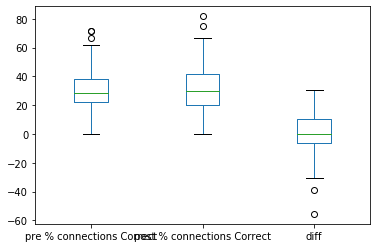

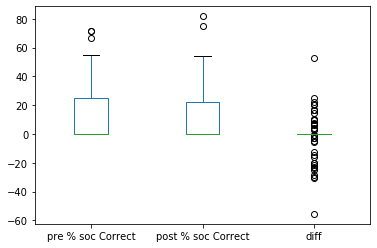

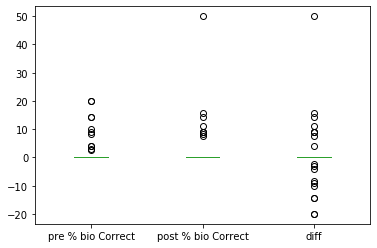

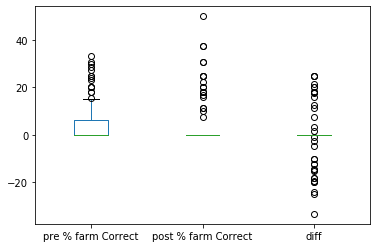

In [0]:
for fp in feature_pairs:
  df2['diff'] = df2[fp[1]] - df2[fp[0]]
  df2[fp+['diff']].plot(kind='box')

TypeError: ignored

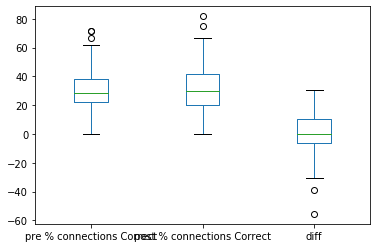

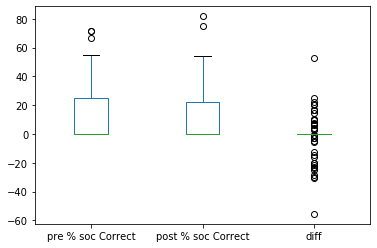

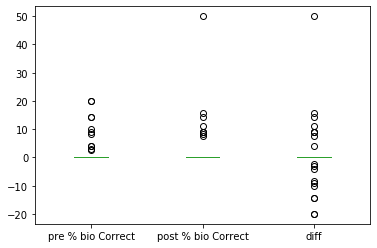

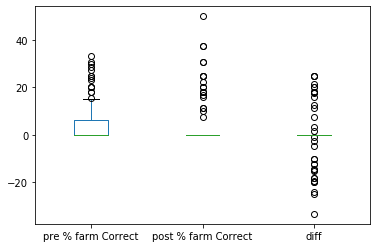

In [0]:
from numpy import log, sqrt
for fp in feature_pairs:
  df2['diff'] = df2[fp[1]] - df2[fp[0]]
  df2[fp+['diff']].plot(kind='box')

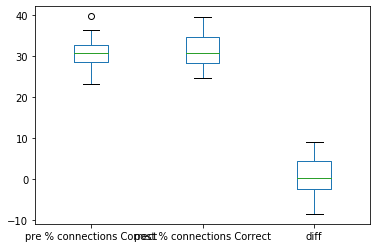

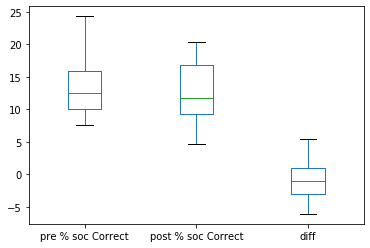

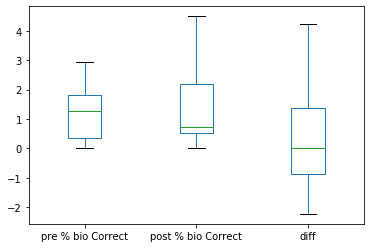

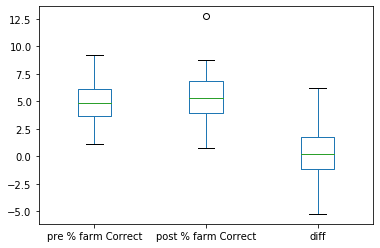

In [0]:
for fp in feature_pairs:
  sampled_df['diff'] = sampled_df[fp[1]] - sampled_df[fp[0]]
  sampled_df[fp+['diff']].plot(kind='box')

#### Assumption Check: Normal

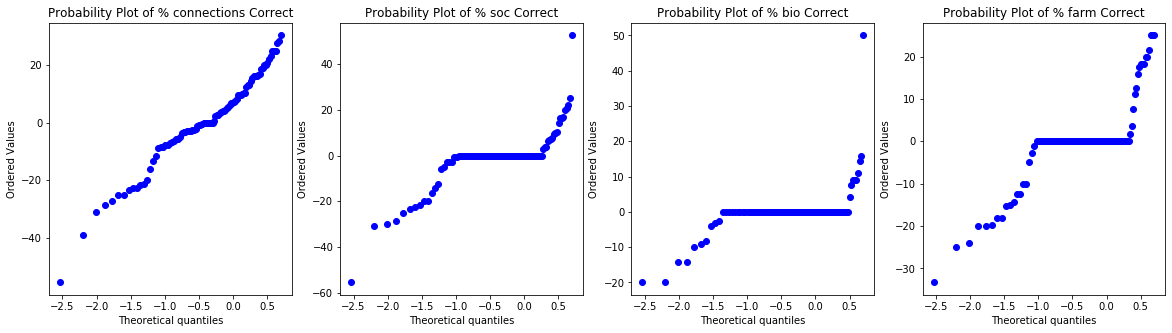

In [0]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,len(feature_pairs), figsize=(20,5))
for i in range(len(feature_pairs)):
  pre, post = feature_pairs[i]
  ax = axes[i]
  stats.probplot(list(df[post] - df[pre]), plot= ax)
  ax.set_title(f'Probability Plot of {pre[4:]}')

In [0]:
sampled_df[post] - sampled_df[pre]

1      -1.86027
2       1.78754
3          -0.5
4       -1.0531
5       2.40741
6      -1.14387
7       4.66667
8      -1.18519
9     -0.773789
10     0.854312
11    -0.603341
12     -3.69066
13     0.440485
14     -5.23077
15     -1.70866
16      1.21429
17     -1.30098
18   -0.0925926
19      6.21212
20      1.93603
21      4.28988
22      3.53968
23      1.48102
24      1.64815
25      3.97403
26     -3.55556
27      1.23333
28       1.7689
29    -0.276094
30      -4.5584
dtype: object

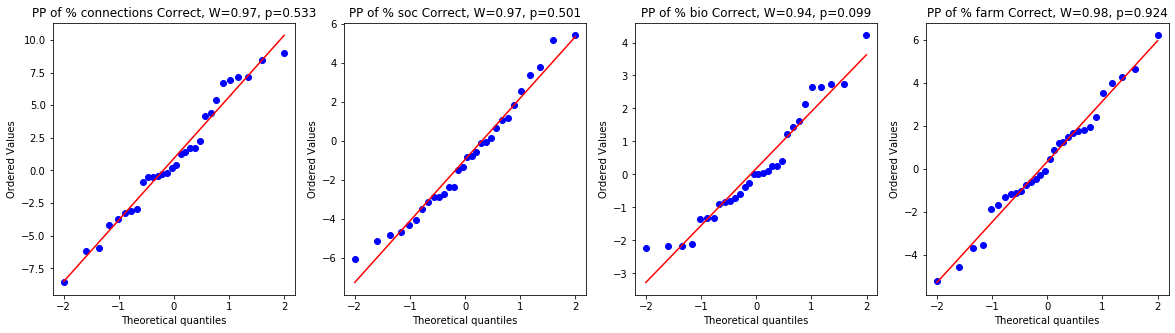

In [0]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,len(feature_pairs), figsize=(20,5))
for i in range(len(feature_pairs)):
  pre, post = feature_pairs[i]
  ax = axes[i]
  stats.probplot(list(sampled_df[post] - sampled_df[pre]), plot= ax)
  W,p = stats.shapiro(sampled_df[post]-sampled_df[pre])
  ax.set_title(f'PP of {pre[4:]}, W={round(W,2)}, p={round(p,3)}')

#### T-Test on paired samples

In [0]:
for pre, post in feature_pairs:
  print('TTest for', pre[4:],stats.ttest_rel(sampled_df[post], sampled_df[pre]))

TTest for % connections Correct Ttest_relResult(statistic=1.0993804116728243, pvalue=0.28064536972290977)
TTest for % soc Correct Ttest_relResult(statistic=-1.7188368616534118, pvalue=0.09630348089918342)
TTest for % bio Correct Ttest_relResult(statistic=0.5659707812138549, pvalue=0.5757673957749663)
TTest for % farm Correct Ttest_relResult(statistic=0.6635005335049639, pvalue=0.5122504876651668)


#### Wilcoxon signed-rank test on paired points

In [0]:
for pre, post in feature_pairs:
  print('TTest for', pre[4:],stats.wilcoxon(df2[post], df2[pre]))

TTest for % connections Correct WilcoxonResult(statistic=2117.5, pvalue=0.1437539142776269)
TTest for % soc Correct WilcoxonResult(statistic=361.0, pvalue=0.6571654164339562)
TTest for % bio Correct WilcoxonResult(statistic=95.5, pvalue=0.49196117539422873)
TTest for % farm Correct WilcoxonResult(statistic=298.5, pvalue=0.49317581944915895)


## Other

### Make new columns for clean to/from nodes

In [0]:
l = list(cm_df['from raw']) + list(cm_df['to raw'])

In [0]:
def find_closest_node(node_name, candidates,char_n=0):
    if len(candidates) == 0:
        return 'OTHER'
    if len(candidates) == 1 or char_n >= len(node_name):
        return candidates[0]
    if '/' in node_name or '&' in node_name:
        return 'OTHER'
    else:
        # squeeze candidates
        candidates = [c for c in candidates if c.upper().startswith(node_name[:char_n].upper())]
        # return
        return find_closest_node(node_name, candidates, char_n=char_n+1)

In [0]:
cleaning_nodes = {k:find_closest_node(k,given) for k in sorted([i for i in l if i not in given])}
#### manual section!
## LOOK THROUGH CLEANING_NODES AND REPLACE ANY BAD MATCHES WITH THE CORRECT ONES
cleaning_nodes['dirt'] = 'SOIL'
cleaning_nodes['coins'] = 'MONEY'
cleaning_nodes['depression'] = 'OTHER'
cleaning_nodes['air'] = 'OTHER'
cleaning_nodes['everything'] = 'OTHER'
cleaning_nodes['animals'] = 'OTHER'
cleaning_nodes['crop water'] = 'OTHER'
cleaning_nodes['fatilze water'] = 'OTHER'
cleaning_nodes['lumber/wood'] = 'OTHER'
cleaning_nodes['paper'] = 'OTHER'
cleaning_nodes['plants'] = 'OTHER'
cleaning_nodes['poop'] = 'MANURE'
cleaning_nodes['rain money'] = 'OTHER'
cleaning_nodes['wheat'] = 'FOOD'
cleaning_nodes['milk'] = 'FOOD'
cleaning_nodes['nutrients'] = 'OTHER'
#### manual section!
cleaning_nodes

{'Algae': 'ALGAE',
 'C.F': 'CROP FARMS',
 'Crop Farm': 'CROP FARMS',
 'Crop farms': 'CROP FARMS',
 'D.F': 'DAIRY FARMS',
 'Dairy Farm': 'DAIRY FARMS',
 'Dairy Farms': 'DAIRY FARMS',
 'Dairy farms': 'DAIRY FARMS',
 'Dairy farms ': 'DAIRY FARMS',
 'Food': 'FOOD',
 'Fruits + Veggies': 'FOOD',
 'Lakes': 'LAKES',
 'Manure': 'MANURE',
 'Money': 'MONEY',
 'None': 'NONE',
 'People': 'PEOPLE',
 'Rain': 'RAIN',
 'Soil': 'SOIL',
 'Water': 'WATER',
 'air': 'OTHER',
 'algae': 'ALGAE',
 'algai': 'ALGAE',
 'algea': 'ALGAE',
 'alger': 'ALGAE',
 'animals': 'OTHER',
 'coins': 'MONEY',
 'crop F': 'CROP FARMS',
 'crop farm': 'CROP FARMS',
 'crop farms': 'CROP FARMS',
 'crop water': 'OTHER',
 'crops': 'CROP FARMS',
 'crops farm': 'CROP FARMS',
 'crops farms': 'CROP FARMS',
 'dair farms': 'DAIRY FARMS',
 'dairy': 'DAIRY FARMS',
 'dairy F': 'DAIRY FARMS',
 'dairy crops': 'DAIRY FARMS',
 'dairy farm': 'DAIRY FARMS',
 'dairy farms': 'DAIRY FARMS',
 'dairy farms ': 'DAIRY FARMS',
 'darry farm': 'DAIRY FARMS',
 

In [0]:
def show_cm_cols():
  print(*[f'{i}. {c}' for i,c in enumerate(cm_df.columns)], sep='\n')
show_cm_cols()

0. Coder
1. User ID
2. Pre/Post
3. from raw
4. to raw
5. from clean
6. Description
7. to clean
8. Direction (0 none,1= -->,2 = <-->)
9. Coder Notes
10. Scorer
11. Unscorable
12. Is a relationship (not a definition, identity). 0 when blank
13. Relationship Description Correct
14. Relevant to System: Algae bloom, population sustainability, need for fertilizer
15. Score (1 if all are 1)
16. Computer Social / Economic
17. Computer Biological / Ecological
18. Computer Farming
19. Scorer Notes
20. Categorizer
21. Social / Economic (mentions $, people, food for people)
22. Biological / Ecological (mentions alge, soil lakes)
23. Farming (famrs, crops, fertilizer/manure)


In [0]:
clean_nodes = lambda l: [n if n in given else cleaning_nodes[n] for n in l]
cm_df['from clean'] = clean_nodes(cm_df['from raw'])
cm_df['to clean'] = clean_nodes(cm_df['to raw'])
has_regex = lambda regex: (cm_df['to clean'].str.contains(regex) | cm_df['from clean'].str.contains(regex)).astype('int')
cm_df.iloc[:,15] = has_regex('MONEY|PEOPLE')
cm_df.iloc[:,16] = has_regex('ALGAE|LAKES|RAIN')
cm_df.iloc[:,17] = has_regex('CROP FARMS|DAIRY FARMS|MANURE')
cm_df

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Jenn,A107,Post,food,soil,FOOD,is grown in,SOIL,1,NaN,Jenn,NaN,1.0,1.0,1.0,0,0,0,0,NaN,COMPUTER,0.0,0.0,0.0
2468,Jenn,A107,Post,money,food,MONEY,food costs money,FOOD,1,NaN,Jenn,NaN,1.0,1.0,1.0,1,0,0,0,NaN,COMPUTER,1.0,0.0,0.0
2469,Jenn,A107,Post,rain,soil,RAIN,waters the soil,SOIL,1,NaN,Jenn,NaN,1.0,1.0,0.0,0,1,0,0,NaN,COMPUTER,0.0,1.0,0.0
2470,Jenn,A107,Post,rain,lakes,RAIN,is found in,LAKES,1,NaN,Jenn,NaN,1.0,1.0,1.0,0,1,0,0,NaN,COMPUTER,0.0,1.0,0.0


#### If needed, export reformatted sheet here.

In [0]:
# cm_df.to_csv('reformatted coding sheet.tsv',sep='\t')

In [0]:
cm_df.head()

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"
0,John,A008,post,people,crop farms,PEOPLE,NaN,CROP FARMS,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
1,John,A008,post,crop farms,manure,CROP FARMS,NaN,MANURE,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,0.0,1.0
2,John,A008,post,crop farms,money,CROP FARMS,NaN,MONEY,0,NaN,David,1.0,0.0,0.0,1.0,1,0,1,1,NaN,NaN,1.0,0.0,1.0
3,John,A008,post,crop farms,soil,CROP FARMS,NaN,SOIL,0,NaN,David,1.0,0.0,0.0,1.0,0,0,1,1,NaN,NaN,0.0,1.0,1.0
4,John,A008,post,soil,water,SOIL,NaN,WATER,0,NaN,David,1.0,0.0,0.0,1.0,0,0,0,0,NaN,NaN,0.0,1.0,NaN


### Explore Concept Map for Pertinent Relationships

In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','rain','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','rain','algae')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','algae','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','water','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


In [0]:
apply_functions_to_df(cm_df, [searchPair('from clean','to clean','lakes','manure')])

,Coder,User ID,Pre/Post,from raw,to raw,from clean,Description,to clean,"Direction (0 none,1= -->,2 = <-->)",Coder Notes,Scorer,Unscorable,"Is a relationship (not a definition, identity). 0 when blank",Relationship Description Correct,"Relevant to System: Algae bloom, population sustainability, need for fertilizer",Score (1 if all are 1),Computer Social / Economic,Computer Biological / Ecological,Computer Farming,Scorer Notes,Categorizer,"Social / Economic (mentions $, people, food for people)","Biological / Ecological (mentions alge, soil lakes)","Farming (famrs, crops, fertilizer/manure)"


### Put labels with log features (moot until we find a good label)

In [0]:
df2.index

Index(['A001', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'A010', 'A011',
       'A012', 'A014', 'A015', 'A016', 'A017', 'A020', 'A021', 'A022', 'A023',
       'A024', 'A025', 'A026', 'A101', 'A102', 'A104', 'A105', 'A106', 'A107',
       'A108', 'A110', 'A111', 'A112', 'A113', 'A114', 'A116', 'A117', 'A121',
       'A302', 'A304', 'A305', 'A306', 'A307', 'A308', 'A309', 'A310', 'A311',
       'A312', 'A403', 'A406', 'A407', 'A408', 'A409', 'A411', 'A412', 'A413',
       'A415', 'A416', 'A501', 'A502', 'A503', 'A504', 'A505', 'A506', 'A507',
       'A508', 'A509', 'A510', 'A512', 'A514', 'A515', 'A517', 'A518', 'A519',
       'A520', 'A521', 'A522', 'A605', 'A606', 'A607', 'A608', 'A609', 'A611',
       'A612', 'A613', 'A614', 'A615', 'A616', 'A617', 'A618', 'A621', 'A622',
       'A623', 'A624', 'A625'],
      dtype='object')

In [0]:
(lf_df.index)

Index(['a007', 'a003', 'a006', 'a023', 'a016', 'a013', 'a010', 'a010', 'a019',
       'a019',
       ...
       'a602', 'a611', 'a622', 'a612', 'a613', 'a617', 'a618', 'a625', 'a603',
       'a603'],
      dtype='object', name='player_id', length=298)

In [0]:
# positive_label = ['a022','a024','a004','a016','a011']
# negative_label = ['a001', 'a005', 'a006', 'a007', 'a008', 'a009', 'a010',
#        'a012', 'a014', 'a015', 'a017', 'a020', 'a021', 'a023',
#         'a025', 'a026']

In [0]:
def get_label(pid):
    if pid in positive_label:
        return 1
    if pid in negative_label:
        return -1
    return 0

In [0]:
labels = [get_label(pid) for pid in lf_df.index]

NameError: ignored

In [0]:
lf_df['learned_runoff'] = labels
df3 = lf_df[(lf_df['learned_runoff']!=0) & (lf_df['sessDuration'] > 180)].sort_values('player_id')
#  df3.to_csv('log_features_with_learned_runoff_label.tsv', sep='\t')

In [0]:
print(list(df3.columns))

In [0]:
df3.loc[:,['play_hour', 'play_minute', 'play_second', 'continue','num_play',
           'sess_avg_time_per_blurb_in_gross_tutorial', 'sess_avg_time_per_blurb_in_gross_again_tutorial',
           'sess_avg_time_per_blurb_in_unused_fertilizer_tutorial', 'sessDuration', 'learned_runoff'
          ]].sort_values('learned_runoff')



In [0]:
pids = list(df3.index)
df4 = pd.DataFrame(index=pids)
c = Counter(pids)
df4['num_plays'] = [c[pid] for pid in pids]
df4['labels'] = [get_label(pid) for pid in pids]

In [0]:
df4.sort_values('num_plays')

In [0]:
df3.loc['a014',[
    'sess_count_achievements', 'sess_count_encounter_tutorial', 'sess_count_skips', 'sess_count_gamestate_logs', 
    'sess_count_buy_home', 'sess_count_buy_food', 'sess_count_buy_farm', 'sess_count_buy_fertilizer', 
    'sess_count_buy_livestock', 'sess_count_buy_skimmer', 'sess_count_buy_sign', 'sess_count_buy_road']]

In [0]:
ret = pd.DataFrame()
for pid in set(df4.index):
    tdf = df3.loc[pid,[
        'lvl3_money_spent_food','sess_count_achievements', 'sess_count_encounter_tutorial', 'sess_count_skips', 'sess_count_gamestate_logs', 
        'sess_count_buy_home', 'sess_count_buy_food', 'sess_count_buy_farm', 'sess_count_buy_fertilizer', 
        'sess_count_buy_livestock', 'sess_count_buy_skimmer', 'sess_count_buy_sign', 'sess_count_buy_road',
    ]]
    if type(tdf) is not pd.core.series.Series:
        tdf = tdf.sum()
    tdf.name = pid
    ret = ret.append(tdf)
ret = ret.sort_index()
ret['label'] = [get_label(pid) for pid in ret.index]
ret.sort_values('label')

In [0]:
tdf2 = pd.DataFrame()
tdf2 = tdf2.append(tdf)


In [0]:
from sklearn.linear_model import Lasso
X = lf_df.loc[:,'lvl0_EventCount':'sessDuration'].drop(['language'],axis=1).fillna(0).to_numpy()
y = lf_df.loc[:,'learned_runoff'].to_numpy()

In [0]:
lasso = Lasso()
lasso.fit(X,y)

In [0]:
print([(i,x) for i,x in enumerate(list(lasso.coef_)) if x > .001])

In [0]:
lf_df.iloc[:,154:155]

In [0]:
lf_df.head()

In [0]:
from matplotlib import pyplot as plt
fig = plt.figure()
hist_df = df2[[f"{p} {item_type}" for item_type in given for p in ['pre','post']]]
plt.figure()
hist_df.hist(figsize=(20,20))
# for i,p in enumerate(['pre','post']):
#     for j,item_type in enumerate(given):
#         col_name = f"{p} {item_type}"
#         fig.add_subplot(len(given),2,i+j+1)
#         df2.hist(col_name)
plt.show()

In [0]:
pairs = [[f"pre {item_type}",f"post {item_type}"] for item_type in given]
pairsPercent = [[f"pre {item_type}%",f"post {item_type}%"] for item_type in given]

In [0]:
# fig,axes = plt.subplots(nrows=len(pairs), ncols=1)
for ax,pair in zip(axes,pairs):
    tdf = df2[pair]
    tdf = tdf.rename(columns={pair[0]: "_"+pair[0]})
    tdf.hist(sharey=True,sharex=True,bins=range(11))
    plt.savefig(f"pre-post hists A0+A6 for {pair[0][4:]}")

In [0]:
for pair in pairsPercent:
    df2[pair].hist()